In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme()
import pandas as pd 
from pathlib import Path 
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D


In [59]:
score_file = Path(Path.home(), "Documents/xray/score_bench/data/36_4/rand_5000_3ca7.csv")
score_df = pd.read_csv(score_file)

score_df.head()

,Unnamed: 0,pdb_file,native,r_all,r_work,r_free,total,rmsd,ml,ff
0,0,/wynton/group/sali/mhancock/xray/decoys/data/3...,0,0.237955,0.233607,0.330722,152671.404598,0.765722,4.987696,3040.529166
1,1,/wynton/group/sali/mhancock/xray/decoys/data/3...,0,0.243301,0.238770,0.339094,153353.708722,0.699803,5.009372,3072.550710
2,2,/wynton/group/sali/mhancock/xray/decoys/data/3...,0,0.242821,0.238484,0.332820,153425.386753,0.682287,5.000132,3421.430812
3,3,/wynton/group/sali/mhancock/xray/decoys/data/3...,0,0.241660,0.237313,0.332872,153708.360312,0.699321,5.013681,3297.941098
4,4,/wynton/group/sali/mhancock/xray/decoys/data/3...,0,0.241890,0.237161,0.338618,153926.080176,0.784977,5.018369,3375.010319


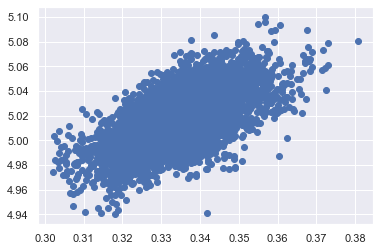

In [62]:
plt.scatter(score_df["r_free"], score_df["ml"])